# Phase 1 — Dataset Overview

This section provides a professional, structured understanding of the raw insurance dataset, including file metadata, schema inspection, column types, basic statistics, and first-level data quality checks.


In [2]:
import pandas as pd
import numpy as np
import os

## 1.1 Loading the Dataset

The dataset is a pipe-delimited (`|`) text file.  
We load it with `dtype=str` first to avoid unintended type conversion.


In [3]:
file_path = "../../data/raw/insurance_data.txt"   # update if different

df = pd.read_csv(
    file_path,
    sep="|",
    dtype=str,            # avoid type conversion
    low_memory=False,
    encoding="utf-8"
)

print("Dataset loaded successfully.")


Dataset loaded successfully.


## 1.2 File Metadata Overview

This section examines:
- Number of rows and columns  
- Column names  
- Memory usage  
- Basic structural properties  


In [5]:
print("Shape (rows, columns):", df.shape)

print("\nColumn Names:")
print(df.columns.tolist())

print("\nMemory Usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")


Shape (rows, columns): (1000098, 52)

Column Names:
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Memory Usage:
2801.8604249954224 MB


## 1.3 High-Level Business Interpretation

This dataset represents insurance policy transactions at a *cover level*.  
Based on the fields, it likely includes:

### **Core Insurance Fields**
- Policy identifiers (PolicyID, UnderwrittenCoverID)
- Policy structure (Section, Product, CoverType, CoverGroup)
- Financial exposure (SumInsured)
- Premium calculations (CalculatedPremiumPerTerm, TotalPremium)
- Claims information (TotalClaims)
- Time-related features (TransactionMonth, PolicyStartDate, PolicyEndDate)

### **Customer Demographics**
- Gender, MaritalStatus, Citizenship
- LegalType (individual/business)
- VAT registration indicator
- Location (Country, Province, PostalCode)

This structure supports:
- Underwriting analysis  
- Risk segmentation  
- Loss ratio and portfolio performance analysis  
- Premium adequacy evaluation  
- Customer profiling  


In [6]:
# Basic sanity checks on the dataset structure

print("=== Basic Integrity Checks ===")

# Check if PolicyID exists and has valid values
if "PolicyID" in df.columns:
    print("Unique PolicyID values:", df["PolicyID"].nunique())
    print("Missing PolicyID values:", df["PolicyID"].isna().sum())
else:
    print("PolicyID column missing.")

# Check if SumInsured, Premium, Claims columns exist
important_cols = ["SumInsured", "CalculatedPremiumPerTerm", "TotalPremium", "TotalClaims"]

for col in important_cols:
    if col in df.columns:
        print(f"\nColumn '{col}' exists.")
        print("  Missing:", df[col].isna().sum())
        print("  Unique values:", df[col].nunique())
    else:
        print(f"\nColumn '{col}' NOT FOUND in dataset.")

# Overall non-null count summary
print("\nNon-null counts per column:")
display(df.notna().sum())


=== Basic Integrity Checks ===
Unique PolicyID values: 7000
Missing PolicyID values: 0

Column 'SumInsured' exists.
  Missing: 0
  Unique values: 2186

Column 'CalculatedPremiumPerTerm' exists.
  Missing: 0
  Unique values: 19869

Column 'TotalPremium' exists.
  Missing: 0
  Unique values: 38959

Column 'TotalClaims' exists.
  Missing: 0
  Unique values: 1615

Non-null counts per column:


UnderwrittenCoverID    1000098
PolicyID               1000098
TransactionMonth       1000098
IsVATRegistered        1000098
Citizenship            1000098
                        ...   
Product                1000098
StatutoryClass         1000098
StatutoryRiskType      1000098
TotalPremium           1000098
TotalClaims            1000098
Length: 52, dtype: int64

## 1.4 Data Types Overview

We inspect how pandas interprets the raw column data types.  
Later phases will convert:
- Dates  
- Numeric financial fields  
- Booleans  
- Categoricals  


In [ ]:
df.dtypes

UnderwrittenCoverID            object
PolicyID                       object
TransactionMonth       datetime64[ns]
IsVATRegistered                object
Citizenship                    object
                            ...      
Product                        object
StatutoryClass                 object
StatutoryRiskType              object
TotalPremium                  float64
TotalClaims                   float64
Length: 52, dtype: object

## 1.5 First-Level Data Quality Scan

We check:
- Missing values  
- Duplicate rows  
- Columns with all null values  
- Suspicious placeholder values (e.g., "-", "?", "NULL")  


In [8]:
print("Missing Values Per Column:")
display(df.isna().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

empty_cols = [col for col in df.columns if df[col].isna().all()]
print("\nColumns with all missing values:", empty_cols)

# Check for common placeholder junk values
placeholders = ["?", "-", "N/A", "NA", "null", "None", ""]
placeholder_counts = {
    col: df[col].isin(placeholders).sum()
    for col in df.columns
}

print("\nPlaceholder Counts (raw):")
{k: v for k, v in placeholder_counts.items() if v > 0}


Missing Values Per Column:


UnderwrittenCoverID    0
PolicyID               0
TransactionMonth       0
IsVATRegistered        0
Citizenship            0
                      ..
Product                0
StatutoryClass         0
StatutoryRiskType      0
TotalPremium           0
TotalClaims            0
Length: 52, dtype: int64


Duplicate Rows: 0

Columns with all missing values: ['NumberOfVehiclesInFleet']

Placeholder Counts (raw):


{}

## 1.6 Dataset Preview

Checking `head`, `tail`, and random sample helps validate:
- Delimiter correctness  
- Column alignment  
- Unexpected nulls  
- Value realism  


In [9]:
display(df.head())
display(df.tail())
display(df.sample(5, random_state=42))


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929824561403,.000000000000
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929824561403,.000000000000
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,.000000000000,.000000000000
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070175439,.000000000000
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6,2597,130,S/D,4,6/2002,119300,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,.000000000000,.000000000000


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4,2693,110,B/S,4,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,500000,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175438596,.000000000000
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4,2693,110,B/S,4,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,500000,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175438596,.000000000000
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4,2693,110,B/S,4,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,500000,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175438596,.000000000000
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4,2693,110,B/S,4,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,5000000,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000000000,.000000000000
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,4614100,Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4,2693,110,B/S,4,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,5000000,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000000000,.000000000000


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
57024,167791,14494,2015-06-01 00:00:00,False,,Individual,Mr,English,ABSA Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1884,Transvaal (all except Pretoria),Transvaal South,Mobility - Motor,47048275,Passenger Vehicle,2015,NISSAN/DATSUN,NV350 2.5 16 SEAT IMPENDULO,4,2488,108,B/S,4,2014-02-01 12:00:00 AM,NaN,Yes,Yes,0,More than 6 months,No,No,No,NaN,NaN,7500,Monthly,8.0735,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,7.082017543859,.000000000000
343371,94043,7424,2015-06-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,2000,Johannesburg,Johannesburg,Mobility - Motor,60058418,Passenger Vehicle,2010,TOYOTA,QUANTUM 2.7 SESFIKILE 15s,4,2694,111,B/S,4,10/2010,NaN,Yes,No,0,More than 6 months,NaN,NaN,NaN,NaN,NaN,7500,Monthly,6.6131,No excess,Cleaning and Removal of Accident Debris,Cleaning and Removal of Accident Debris,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,5.800964912280,.000000000000
641034,153347,13967,2015-05-01 00:00:00,False,,Individual,Mr,English,Standard Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1401,Rand East,Rand East,Mobility - Motor,60058407,Passenger Vehicle,2015,TOYOTA,QUANTUM 2.5 D-4D SESFIKILE 16s,4,2494,75,B/S,4,4/2012,NaN,Yes,Yes,0,More than 6 months,NaN,NaN,NaN,NaN,NaN,5000,Monthly,5.5807,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,4.895350877192,.000000000000
42687,148931,13317,2015-07-01 00:00:00,False,,Individual,Mr,English,NaN,NaN,Not specified,Not specified,South Africa,Limpopo,0607,Transvaal (all except Pretoria),Transvaal North,Mobility - Motor,44004540,Medium Commercial,2009,MERCEDES-BENZ,SPRINTER 416 CDI HI-ROOF F/C P/V,5,2700,115,P/V,2,5/2004,NaN,Yes,Yes,239600,More than 6 months,No,No,No,NaN,NaN,5000,Monthly,3.669,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,3.218421052631,.000000000000
850800,51314,3870,2015-04-01 00:00:00,False,,Private company,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Western Cape,7405,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,60058400,Passenger Vehicle,2008,TOYOTA,QUANTUM 2.5 D-4D 14 SEAT,4,2494,75,B/S,4,3/2005,134800,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,7500,Monthly,5.3272,No excess,Cleaning and Removal of Accident Debris,Cleaning and Removal of Accident Debris,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,4.672982456140,.000000000000


## 1.7 Summary Statistics

We review:
- Numeric columns (as strings for now)
- Categorical unique values  
- Value distributions for key insurance columns  


In [10]:
# Numeric-like columns (we will convert later in Phase 2)
potential_numeric_cols = [
    col for col in df.columns
    if df[col].str.replace('.', '', 1).str.isnumeric().any()
]

print("Potential Numeric Columns:", potential_numeric_cols)

print("\nSummary Statistics (raw, string-based):")
display(df.describe(include='all'))


Potential Numeric Columns: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']

Summary Statistics (raw, string-based):


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,991839,990562,1000098,1000098,1000098,1000098,1000098,1000098,999546,999546,1000098,999546,999546,999546,999546,999546,999546,999546,999546,220456,1000098,1000098,1000096,846803,358197,358197,358197,698,0,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,116532,7000,23,2,4,6,5,1,11,3,3,3,1,9,888,16,45,1,427,5,25,46,411,7,122,82,13,6,174,923,2,2,659,2,2,2,2,1,0,2186,2,19869,13,28,22,14,5,4,1,1,38959,1615
top,85639,3870,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,2000,Transvaal (all except Pretoria),Johannesburg,Mobility - Motor,60058419,Passenger Vehicle,2014,TOYOTA,QUANTUM 2.7 SESFIKILE 16s,4,2694,111,B/S,4,4/2012,250000,Yes,No,0,More than 6 months,No,No,No,No,NaN,7500,Monthly,25,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,.000000000000,.000000000000
freq,30,10400,106747,995075,895210,911929,933555,1000098,260811,597938,986208,940990,1000098,393865,133498,296187,176020,1000098,186087,933598,155889,813280,186087,965284,497056,496946,844400,892838,287638,4401,999861,656617,779482,845223,358165,358165,358110,698,NaN,262599,999554,81499,791235,104158,104183,824124,828125,915028,1000098,1000098,381634,997305


# Phase 2 — Data Quality Assessment

This phase inspects the quality of the dataset to ensure it is clean and reliable for preprocessing and EDA.


In [11]:
# Total missing values per column
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

print("Missing Values Overview:")
display(missing_df)


Missing Values Overview:


,missing_count,missing_percent
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
Rebuilt,641901,64.183810
Converted,641901,64.183810
...,...,...
Product,0,0.000000
StatutoryClass,0,0.000000
StatutoryRiskType,0,0.000000
TotalPremium,0,0.000000


In [12]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Optional: view sample duplicates
if duplicate_count > 0:
    display(df[df.duplicated()])


Number of duplicate rows: 0


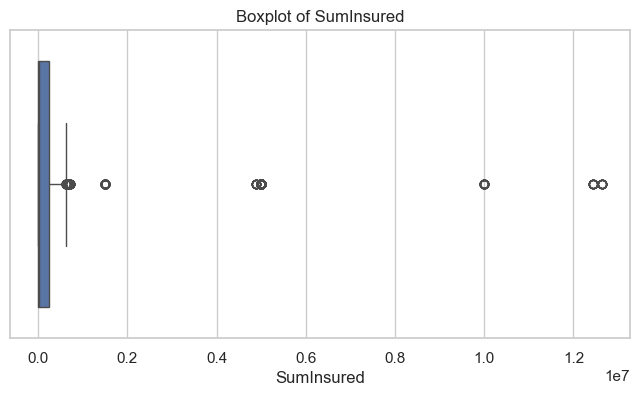

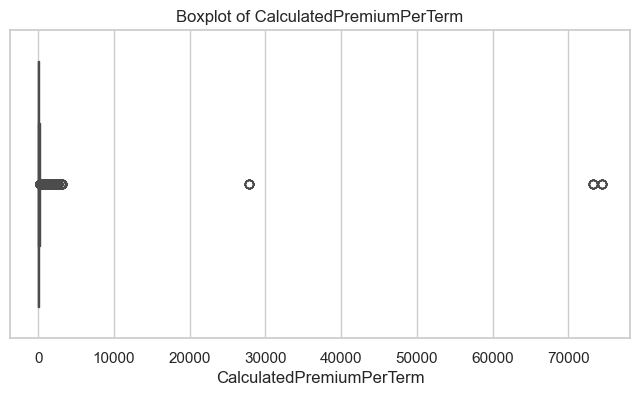

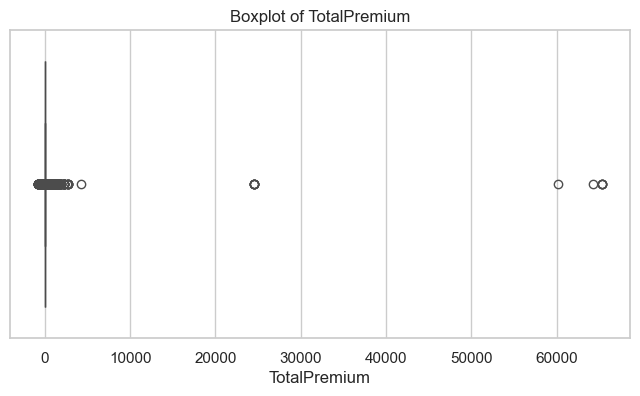

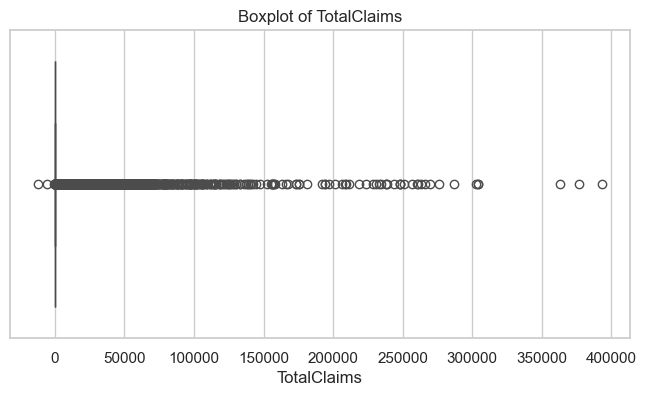

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Financial columns to check
financial_cols = ["SumInsured", "CalculatedPremiumPerTerm", "TotalPremium", "TotalClaims"]

# Convert to numeric safely (ignore errors)
for col in financial_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Boxplots for outlier detection
for col in financial_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [18]:
for col in df.columns:
    # Try to convert to numeric and see how many values succeed
    num_convertible = pd.to_numeric(df[col], errors='coerce').notna().sum()
    total_count = len(df[col])
    
    if num_convertible / total_count >= 0.9:  # 90% or more convertible → numeric expected
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"[TYPE ISSUE] Column '{col}' is not numeric but should be.")
        else:
            print(f"[OK] Column '{col}' is numeric.")
    else:  # Mostly non-numeric → categorical expected
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"[TYPE ISSUE] Column '{col}' is numeric but should be categorical/object.")
        else:
            print(f"[OK] Column '{col}' is object/categorical.")


[TYPE ISSUE] Column 'UnderwrittenCoverID' is not numeric but should be.
[TYPE ISSUE] Column 'PolicyID' is not numeric but should be.
[TYPE ISSUE] Column 'TransactionMonth' is not numeric but should be.
[OK] Column 'IsVATRegistered' is object/categorical.
[OK] Column 'Citizenship' is object/categorical.
[OK] Column 'LegalType' is object/categorical.
[OK] Column 'Title' is object/categorical.
[OK] Column 'Language' is object/categorical.
[OK] Column 'Bank' is object/categorical.
[OK] Column 'AccountType' is object/categorical.
[OK] Column 'MaritalStatus' is object/categorical.
[OK] Column 'Gender' is object/categorical.
[OK] Column 'Country' is object/categorical.
[OK] Column 'Province' is object/categorical.
[TYPE ISSUE] Column 'PostalCode' is not numeric but should be.
[OK] Column 'MainCrestaZone' is object/categorical.
[OK] Column 'SubCrestaZone' is object/categorical.
[OK] Column 'ItemType' is object/categorical.
[TYPE ISSUE] Column 'mmcode' is not numeric but should be.
[OK] Column 

In [15]:
# TransactionMonth validation
if "TransactionMonth" in df.columns:
    df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce', format="%Y-%m")
    print("TransactionMonth conversion complete.")
    print("Invalid dates (NaT):", df["TransactionMonth"].isna().sum())


TransactionMonth conversion complete.
Invalid dates (NaT): 1000098


In [20]:
# Common placeholders to check
placeholders = ["?", "-", "N/A", "NA", "null", "None", ""]

placeholder_counts = {col: df[col].isin(placeholders).sum() for col in df.columns}
print("Columns with placeholder values (>0):")
{k:v for k,v in placeholder_counts.items() if v>0}


Columns with placeholder values (>0):


{}

## Phase 3 — Feature-Level Understanding

In this phase, we analyze each feature individually to understand its distribution, uniqueness, and potential impact on insurance risk and premiums. 

We focus on:

1. **Policy & Plan Features** (Critical)  
2. **Customer / Insured Demographics** (Medium-High Value)  
3. **Vehicle Features**  

This analysis is exploratory; no type conversions are applied yet. The goal is to uncover patterns, identify anomalies, and prepare insights for preprocessing and modeling.


### Policy & Plan Features

These are critical features that determine premium, exposure, and claim relationships.  
We examine distributions, unique counts, and identify potential outliers or anomalies.


In [38]:
policy_cols = [
    "PolicyID", "UnderwrittenCoverID", "TransactionMonth", "SumInsured",
    "CalculatedPremiumPerTerm", "TotalPremium", "TotalClaims",
    "CoverType", "CoverCategory", "CoverGroup", "Section", "Product",
    "TermFrequency"
]

for col in policy_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print("-" * 50)
        if df[col].dtype in ["object", "string"]:
            print(df[col].value_counts(dropna=False).head(10))
        else:
            print(df[col].describe())



Column: PolicyID
--------------------------------------------------
PolicyID
3870    10400
698      4500
5351     3080
6924     2852
9774     2392
4641     2227
6653     2094
6641     2028
6643     2010
2137     1941
Name: count, dtype: int64

Column: UnderwrittenCoverID
--------------------------------------------------
UnderwrittenCoverID
85639    30
85646    30
85638    30
85640    30
85651    30
85642    30
85641    30
85650    30
85643    30
85644    30
Name: count, dtype: int64

Column: TransactionMonth
--------------------------------------------------
count      0
mean     NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: TransactionMonth, dtype: object

Column: SumInsured
--------------------------------------------------
count    1.000098e+06
mean     6.041727e+05
std      1.508332e+06
min      1.000000e-02
25%      5.000000e+03
50%      7.500000e+03
75%      2.500000e+05
max      1.263620e+07
Name: SumInsured, dtype: float64

Column: CalculatedPremi

policy_cols = [
    "PolicyID", "UnderwrittenCoverID", "TransactionMonth", "SumInsured",
    "CalculatedPremiumPerTerm", "TotalPremium", "TotalClaims",
    "CoverType", "CoverCategory", "CoverGroup", "Section", "Product",
    "TermFrequency"
]

for col in policy_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print("-" * 50)
        if df[col].dtype in ["object", "string"]:
            print(df[col].value_counts(dropna=False).head(10))
        else:
            print(df[col].describe())


### Customer / Insured Demographics

These features help segment clients and identify differences in risk profiles.  
We focus on distributions, missing values, and unique counts.


In [39]:
customer_cols = [
    "MaritalStatus", "Gender", "Citizenship", "LegalType", "Language",
    "IsVATRegistered", "Country", "Province", "PostalCode"
]

for col in customer_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print("-" * 50)
        print(df[col].value_counts(dropna=False))



Column: MaritalStatus
--------------------------------------------------
MaritalStatus
Not specified    986208
NaN                8259
Single             4254
Married            1377
Name: count, dtype: int64

Column: Gender
--------------------------------------------------
Gender
Not specified    940990
Male              42817
NaN                9536
Female             6755
Name: count, dtype: int64

Column: Citizenship
--------------------------------------------------
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

Column: LegalType
--------------------------------------------------
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64

Column: Language
--------------------------------------------------
Language
English    1000098
Name: count, dtype: int64

Column: IsVATRegistered
----------

### Vehicle Features

Vehicle characteristics strongly influence risk and claims.  
We check distributions, value counts, and potential outliers.


In [40]:
vehicle_cols = [
    "ItemType", "Mmcode", "VehicleType", "RegistrationYear", "Make", "Model",
    "Cylinders", "Cubiccapacity", "Kilowatts", "Bodytype", "NumberOfDoors",
    "VehicleIntroDate", "CustomValueEstimate"
]

for col in vehicle_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print("-" * 50)
        if df[col].dtype in ["object", "string"]:
            print(df[col].value_counts(dropna=False).head(10))
        else:
            print(df[col].describe())



Column: ItemType
--------------------------------------------------
ItemType
Mobility - Motor    1000098
Name: count, dtype: int64

Column: VehicleType
--------------------------------------------------
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
NaN                     552
Name: count, dtype: int64

Column: RegistrationYear
--------------------------------------------------
RegistrationYear
2014    155889
2012    130884
2013    117064
2008    106008
2010     95579
2011     88765
2007     82514
2009     72168
2006     45111
2005     30901
Name: count, dtype: int64

Column: Model
--------------------------------------------------
Model
QUANTUM 2.7 SESFIKILE 16s         186087
QUANTUM 2.7 SESFIKILE 15s         167523
QUANTUM 2.7 SESFIKILE 14s         137242
QUANTUM 2.5 D-4D SESFIKILE 16s     99444
HiACE SUPER 16 F/Lift              79525
HiACE SIYAYA                       40960
QU

### Loss Ratio Overview

Compute overall and category-specific loss ratios (TotalClaims / TotalPremium)  
to highlight high-risk segments and patterns by cover type.  

We handle cases where `TotalPremium` might be zero to avoid divide-by-zero errors.


In [ ]:
import numpy as np

# 1️ Overall Loss Ratio
overall_lr = df["TotalClaims"].sum() / df["TotalPremium"].sum()
print(f"Overall Loss Ratio: {overall_lr:.4f}")

# 2️ Loss Ratio by CoverType safely
if "CoverType" in df.columns:
    def safe_loss_ratio(x):
        total_premium = x["TotalPremium"].sum()
        total_claims = x["TotalClaims"].sum()
        return total_claims / total_premium if total_premium != 0 else np.nan  # avoid divide by zero

    cover_lr = df.groupby("CoverType").apply(lambda x: safe_loss_ratio(x))
    cover_lr = cover_lr.fillna(0)  # optional: replace NaN with 0 for easy reading

    print("\nLoss Ratio by CoverType:")
    print(cover_lr.sort_values(ascending=False))  # optional: sort by highest loss ratio


Overall Loss Ratio: 1.0477

Loss Ratio by CoverType:
CoverType
Own Damage                                             1.577959
Windscreen                                             0.997724
Income Protector                                       0.862845
Deposit Cover                                          0.656235
Credit Protection                                      0.180092
Third Party                                            0.118173
Roadside Assistance                                    0.096970
Emergency Charges                                      0.051045
Keys and Alarms                                        0.035301
Cash Takings                                           0.000000
Asset Value Preserver                                  0.000000
Accidental Death                                       0.000000
Basic Excess Waiver                                    0.000000
Baggage/Luggage                                        0.000000
Cleaning and Removal of Accident Debris  

C:\Users\derej\AppData\Local\Temp\ipykernel_133732\3352600557.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cover_lr = df.groupby("CoverType").apply(lambda x: safe_loss_ratio(x))


#### Step 10 — Schema & Column Overview

Check dataset schema:  
- Column names  
- Data types (object, int, float, datetime)  
- Number of unique values per column  

This gives a first idea of which columns might require preprocessing later.



In [46]:
# Column names, data types, and number of unique values
schema_overview = pd.DataFrame({
    "dtype": df.dtypes,
    "unique_values": df.nunique(),
    "missing_values": df.isna().sum()
}).sort_values(by="missing_values", ascending=False)

print("Schema overview with dtype, unique values, and missing values:")
display(schema_overview)


Schema overview with dtype, unique values, and missing values:


,dtype,unique_values,missing_values
TransactionMonth,datetime64[ns],0,1000098
NumberOfVehiclesInFleet,object,0,1000098
CrossBorder,object,1,999400
CustomValueEstimate,object,923,779642
Rebuilt,object,2,641901
...,...,...,...
Product,object,4,0
StatutoryClass,object,1,0
StatutoryRiskType,object,1,0
TotalPremium,float64,38959,0


### Step 11 — Missing Value Analysis

Identify which columns have missing values.  
Missing values in critical columns (PolicyID, TotalPremium, TotalClaims, SumInsured) may require special attention.


In [47]:
# Percentage of missing values per column
missing_pct = (df.isna().sum() / len(df)) * 100
missing_summary = pd.DataFrame({"missing_count": df.isna().sum(), "missing_pct": missing_pct})
missing_summary = missing_summary.sort_values(by="missing_pct", ascending=False)

print("Missing value summary:")
display(missing_summary)


Missing value summary:


,missing_count,missing_pct
TransactionMonth,1000098,100.000000
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
Rebuilt,641901,64.183810
...,...,...
Product,0,0.000000
StatutoryClass,0,0.000000
StatutoryRiskType,0,0.000000
TotalPremium,0,0.000000


### Step 14 — Key Insurance Variables

Focus on the columns that are most relevant for insurance risk analysis:

**Policy Details (Critical):**
- PolicyID, UnderwrittenCoverID, TransactionMonth
- SumInsured, CalculatedPremiumPerTerm, TotalPremium, TotalClaims
- CoverType, CoverCategory, CoverGroup, Section, Product, TermFrequency

**Customer / Demographics (Medium-High Value):**
- MaritalStatus, Gender, Citizenship, LegalType, Language, IsVATRegistered
- Country, Province, PostalCode

**Vehicle / Asset Details (Medium Value):**
- ItemType, Mmcode, VehicleType, RegistrationYear, Make, Model
- Cylinders, Cubiccapacity, Kilowatts, NumberOfDoors
- VehicleIntroDate, CustomValueEstimate, CapitalOutstanding


### Step 15 — Target and Risk Metrics

Define key insurance metrics:

- **Loss Ratio:** TotalClaims / TotalPremium
- **Claim Frequency:** proportion of policies with at least one claim
- **Claim Severity:** average claim amount given a claim occurred
- **Premium Adequacy:** CalculatedPremiumPerTerm vs TotalPremium
- **Exposure Drivers:** SumInsured, CoverType, Product, VehicleType


In [48]:
# Example: compute basic portfolio metrics
overall_loss_ratio = df["TotalClaims"].sum() / df["TotalPremium"].sum()
print(f"Overall Portfolio Loss Ratio: {overall_loss_ratio:.4f}")

claim_frequency = (df["TotalClaims"] > 0).mean()
print(f"Claim Frequency (proportion of policies with claims): {claim_frequency:.4f}")

claim_severity = df[df["TotalClaims"] > 0]["TotalClaims"].mean()
print(f"Claim Severity (avg claim amount): {claim_severity:.2f}")


Overall Portfolio Loss Ratio: 1.0477
Claim Frequency (proportion of policies with claims): 0.0028
Claim Severity (avg claim amount): 23273.39


### Step 16 — Preliminary Observations

- Certain CoverTypes may show unusually high or low loss ratios.  
- Some provinces or postal codes might concentrate high-risk policies.  
- Vehicle characteristics (Make, Model, Year, Kilowatts) may correlate with claims.  
- Customer demographics (Gender, MaritalStatus) might indicate risk segmentation.  
- Identify potential data issues affecting business insight, e.g., missing values, extreme outliers.


In [49]:
# Quick group-based insights
loss_ratio_by_covertype = df.groupby("CoverType").apply(
    lambda x: x["TotalClaims"].sum() / x["TotalPremium"].sum()
)
print("Loss Ratio by CoverType:")
display(loss_ratio_by_covertype.sort_values(ascending=False).head(10))

loss_ratio_by_province = df.groupby("Province").apply(
    lambda x: x["TotalClaims"].sum() / x["TotalPremium"].sum()
)
print("Loss Ratio by Province:")
display(loss_ratio_by_province.sort_values(ascending=False))


Loss Ratio by CoverType:


C:\Users\derej\AppData\Local\Temp\ipykernel_133732\3450633231.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  lambda x: x["TotalClaims"].sum() / x["TotalPremium"].sum()
C:\Users\derej\AppData\Local\Temp\ipykernel_133732\3450633231.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_covertype = df.groupby("CoverType").apply(


CoverType
Factory Fitted Sound and Other Electronic Equipment         inf
Own Damage                                             1.577959
Windscreen                                             0.997724
Income Protector                                       0.862845
Deposit Cover                                          0.656235
Credit Protection                                      0.180092
Third Party                                            0.118173
Roadside Assistance                                    0.096970
Emergency Charges                                      0.051045
Keys and Alarms                                        0.035301
dtype: float64

Loss Ratio by Province:


C:\Users\derej\AppData\Local\Temp\ipykernel_133732\3450633231.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby("Province").apply(


Province
Gauteng          1.222018
KwaZulu-Natal    1.082693
Western Cape     1.059472
North West       0.790367
Mpumalanga       0.720897
Free State       0.680758
Limpopo          0.661199
Eastern Cape     0.633813
Northern Cape    0.282699
dtype: float64

In [10]:
import pandas as pd

df_clean = pd.read_csv("../../data/raw/unclean.csv")

print(df_clean["TotalClaims"].describe())
print(df_clean["TotalClaims"].unique()[:20])


C:\Users\derej\AppData\Local\Temp\ipykernel_126056\2101066124.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv("../../data/raw/unclean.csv")


count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: TotalClaims, dtype: float64
[    0.          2294.09649123  2040.47368421 46492.21175439
 26516.85964912  6140.35087719  4385.96491228 25438.59649123
 16715.         74967.01754386 14867.5         2192.98245614
  1450.           921.05263158 16804.46491228  2889.70175439
   877.19298246 15262.60526316 72445.03508772  5263.15789474]
